In [174]:
# Семинар 11: гетероскедастичность

import numpy as np
import pandas as pd # чтение файлов
import matplotlib.pyplot as plt # построение графиков
import seaborn as sns # построение графиков
import statsmodels.api as sm # тесты
import statsmodels
import statsmodels.stats.diagnostic as sm_diagnostic # тест Бройша-Пагана


import statsmodels.formula.api as smf

In [175]:
get_ipython().system('pip install rdatasets') # наборы данных
# !pip install pyreadstat # чтение spss/stata данных
from rdatasets import data 
# from pyreadstat import read_sav, set_value_labels

In [176]:
flats = pd.read_excel('/Users/polinapogorelova/Desktop/Метрика_ИП/Данные/dataflats.xlsx')

In [177]:
import math
flats['price_sq'] = flats['price']/flats['totsp']
flats

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,factor,price_sq
0,81,58,40,6.0,12.5,7,1,1,1,кирпич,1.396552
1,75,44,28,6.0,13.5,7,1,0,1,не кирпич,1.704545
2,128,70,42,6.0,14.5,3,1,1,1,кирпич,1.828571
3,95,61,37,6.0,13.5,7,1,0,1,не кирпич,1.557377
4,330,104,60,11.0,10.5,7,0,1,1,кирпич,3.173077
...,...,...,...,...,...,...,...,...,...,...,...
2035,110,77,45,10.0,12.0,5,0,0,1,не кирпич,1.428571
2036,95,60,43,6.0,9.0,5,0,0,1,не кирпич,1.583333
2037,95,60,46,5.0,10.5,5,1,0,1,не кирпич,1.583333
2038,129,76,48,10.0,12.5,5,0,0,1,не кирпич,1.697368


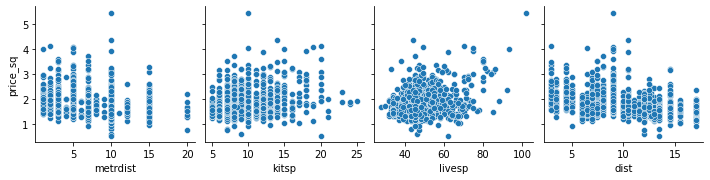

In [179]:
# Построим графики зависимостей цены 1 кв.м. квартиры от факторов
sns.pairplot(flats, x_vars=["metrdist", "kitsp", "livesp", "dist"], y_vars=["price_sq"])

In [180]:
reg = smf.ols("price ~ livesp + kitsp + dist + metrdist", flats).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     855.4
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:34:29   Log-Likelihood:                -9943.5
No. Observations:                2040   AIC:                         1.990e+04
Df Residuals:                    2035   BIC:                         1.993e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.7907      5.447     -6.020      0.000     -43.473     -22.108
livesp         3.4394      0.111     31.043      0.000       3.222       3.657
kitsp          5.1557      0.308     16.728      0.000       4.551       5.760
dist          -3.1113      0.214    -14.572      0.000      -3.530      -2.693
metrdist      -1.3253      0.185     -7.162      0.000      -1.688      -0.962
==============================================================================
Omnibus:                     1232.801   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34063.594
Skew:                           2.347   Prob(JB):                         0.00
Kurtosis:                      22.461   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
# Сохраним прогнозные значения
flats['price_pred'] = reg.predict()
# Сохраним остатки модели
flats['resid'] = reg.resid
# Cоздадим переменную resid2 = resid^2
flats['resid2'] = reg.resid**2
flats

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,factor,price_sq,price_pred,resid,resid2
0,81,58,40,6.0,12.5,7,1,1,1,кирпич,1.396552,87.552620,-6.552620,42.936824
1,75,44,28,6.0,13.5,7,1,0,1,не кирпич,1.704545,43.168027,31.831973,1013.274503
2,128,70,42,6.0,14.5,3,1,1,1,кирпич,1.828571,93.509911,34.490089,1189.566213
3,95,61,37,6.0,13.5,7,1,0,1,не кирпич,1.557377,74.122977,20.877023,435.850079
4,330,104,60,11.0,10.5,7,0,1,1,кирпич,3.173077,188.342522,141.657478,20066.841099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,110,77,45,10.0,12.0,5,0,0,1,не кирпич,1.428571,129.578788,-19.578788,383.328933
2036,95,60,43,6.0,9.0,5,0,0,1,не кирпич,1.583333,111.411109,-16.411109,269.324490
2037,95,60,46,5.0,10.5,5,1,0,1,не кирпич,1.583333,111.906742,-16.906742,285.837940
2038,129,76,48,10.0,12.5,5,0,0,1,не кирпич,1.697368,138.341442,-9.341442,87.262534


/Users/polinapogorelova/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


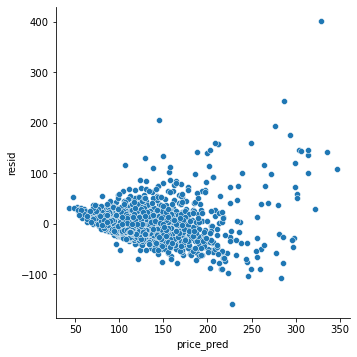

In [182]:
# Построим график зависимости остатков модели от прогнозных значений
sns.pairplot(flats, x_vars=['price_pred'], y_vars=["resid"], size=5)

In [185]:
# Тест Уайта
# H0: ошибки гомоскедастичны
# H1: ошибки гетероскедастичны

flats['livesp2']=flats['livesp']**2
flats['kitsp2']=flats['kitsp']**2
flats['dist2']=flats['dist']**2
flats['metrdist2']=flats['metrdist']**2

flats['livekit']=flats['livesp']*flats['kitsp']
flats['livedist']=flats['livesp']*flats['dist']
flats['livemetrdist']=flats['livesp']*flats['metrdist']
flats['kitspdist']=flats['kitsp']*flats['dist']
flats['kitspmetrdist']=flats['kitsp']*flats['metrdist']
flats['distmetrdist']=flats['dist']*flats['metrdist']

reg_white = smf.ols("resid2 ~ 1 + livesp + kitsp + dist + metrdist + livesp2 + kitsp2 + dist2 + metrdist2 + livekit + livedist + livemetrdist + kitspdist + kitspmetrdist + distmetrdist", flats).fit()
reg_white.summary()

# Модель значима (p-value = 0 для F-статистики), следовательно, гипотеза H1 не отвергается, присутствует гетероскедастичность.
# Однако тест Уайта не дает нам точную форму гетероскедастичности.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resid2   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     106.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          1.12e-230
Time:                        13:48:45   Log-Likelihood:                -19557.
No. Observations:                2040   AIC:                         3.914e+04
Df Residuals:                    2025   BIC:                         3.923e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.809e+04   2889.206     13.183      0.000    3.24e+04    4.38e+04
livesp        -1973.9460     91.259    -21.630      0.000   -2152.916   -1794.976
kitsp          2480.2105    234.448     10.579      0.000    2020.427    2939.995
dist           -197.9428    206.573     -0.958      0.338    -603.061     207.176
metrdist       -638.8172    181.308     -3.523      0.000    -994.387    -283.248
livesp2          25.0479      0.845     29.636      0.000      23.390      26.705
kitsp2           33.2983      6.911      4.818      0.000      19.746      46.851
dist2             1.4831      5.786      0.256      0.798      -9.864      12.830
metrdist2        -4.6308      4.496     -1.030      0.303     -13.447       4.186
livekit         -58.9822      3.974    -14.842      0.000     -66.776     -51.189
livedist          4.4136      3.806      1.160      0.246      -3.051      11.878
livemetrdist     15.3003      3.383      4.523      0.000       8.667      21.934
kitspdist       -14.8904     10.700     -1.392      0.164     -35.874       6.093
kitspmetrdist    -7.3878      9.015     -0.819      0.413     -25.068      10.292
distmetrdist      7.7437      6.407      1.209      0.227      -4.822      20.310
==============================================================================
Omnibus:                     3106.379   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3587094.628
Skew:                           8.798   Prob(JB):                         0.00
Kurtosis:                     207.674   Cond. No.                     9.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
# Тест Бройша-Пагана (зависимость дисперсии от доп. факторов)

X = flats[["livesp", "kitsp", "dist", "metrdist"]]
BP_test = sm_diagnostic.het_breuschpagan(resid=resid, exog_het=X)
from statsmodels.compat import lzip
print(pd.DataFrame(lzip(['LM statistic', 'p-value',  'F-value', 'F: p-value'], BP_test)))

# Первое из выданных значений - значение тестовой статистики теста Бройша - Пагана, второе - значение p-value для выданной тестовой 
# статистики. 
# Третье и четвёртое - значения тестовой статистики и её p-value для на уровне значимости 5% (табличное). 
# Вывод: так как p-value=0 < 0.05, то гипотеза H1 не отвергается, то есть етероскедастичность присутствует.

              0             1
0  LM statistic  2.600943e+02
1       p-value  4.289431e-56
2       F-value  7.437923e+01
3    F: p-value  6.564532e-59


In [187]:
# Тест Голдфелда - Квандта по переменной `kitsp`

sm_diagnostic.het_goldfeldquandt(y = flats["price"], x = X, alternative = "two-sided")

# Значение p-value близко к 0, следовательно, основная гипотеза о гомоскедастичности отвергается.

(0.8841702732095175, 0.04989309651908604, 'two-sided')

In [188]:
resid_abs = abs(resid)
resid_abs

0         6.552620
1        31.831973
2        34.490089
3        20.877023
4       141.657478
           ...    
2035     19.578788
2036     16.411109
2037     16.906742
2038      9.341442
2039      0.222064
Length: 2040, dtype: float64

In [189]:
# Взвешенный МНК
# Для начала оценим реегрессию модуля остатков на kitsp

reg_w = smf.ols('resid_abs ~ kitsp', flats).fit()
reg_w.summary()

# Модель значима, так как p-value=0 в F-тесте

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              resid_abs   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     367.3
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           2.13e-75
Time:                        13:49:02   Log-Likelihood:                -9215.1
No. Observations:                2040   AIC:                         1.843e+04
Df Residuals:                    2038   BIC:                         1.845e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4716      1.643     -5.765      0.000     -12.694      -6.250
kitsp          3.3766      0.176     19.164      0.000       3.031       3.722
==============================================================================
Omnibus:                     2065.480   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           231391.741
Skew:                           4.619   Prob(JB):                         0.00
Kurtosis:                      54.351   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Зададим веса
reg_w.predict()
weight = reg_w.predict()**2
weight

array([116.37644333, 116.37644333, 116.37644333, ...,  54.92630705,
       590.20053652, 200.62893441])

In [191]:
X = sm.add_constant(X) # добавим столдбец из 1 в матрицу X, чтобы включить константу

# Оценим с помощью GLS (Feasible GLS) исходную модель регрессии
reg_wls = sm.WLS(flats["price"], X, weights = weight).fit()
reg_wls.summary()

/Users/polinapogorelova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            WLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     966.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:49:10   Log-Likelihood:                -11057.
No. Observations:                2040   AIC:                         2.212e+04
Df Residuals:                    2035   BIC:                         2.215e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.1842      6.906     -6.688      0.000     -59.727     -32.641
livesp         4.4767      0.116     38.619      0.000       4.249       4.704
kitsp          3.2547      0.304     10.717      0.000       2.659       3.850
dist          -4.3957      0.308    -14.249      0.000      -5.001      -3.791
metrdist      -1.7295      0.261     -6.638      0.000      -2.240      -1.219
==============================================================================
Omnibus:                     1114.645   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47479.501
Skew:                           1.888   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
# Второй способ борьбы с гетероскедастичностью - использование робастных оценок, напрмиер, в форме Уайта.

reg_robust = reg.get_robustcov_results()
reg_robust.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          1.90e-163
Time:                        13:49:13   Log-Likelihood:                -9943.5
No. Observations:                2040   AIC:                         1.990e+04
Df Residuals:                    2035   BIC:                         1.993e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.7907     13.154     -2.493      0.013     -58.588      -6.994
livesp         3.4394      0.331     10.398      0.000       2.791       4.088
kitsp          5.1557      0.584      8.831      0.000       4.011       6.301
dist          -3.1113      0.231    -13.493      0.000      -3.564      -2.659
metrdist      -1.3253      0.172     -7.687      0.000      -1.663      -0.987
==============================================================================
Omnibus:                     1232.801   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34063.594
Skew:                           2.347   Prob(JB):                         0.00
Kurtosis:                      22.461   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""